In [1]:
#importing libraries 
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## Gather Data

In [2]:
#storing the data into variable
boston_dataset=load_boston()


In [3]:
#DIR-The dir() function returns all properties and methods of the specified object, without the values
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#creating pandas dataframe
data=pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)

#adding target variable
data['PRICE']=boston_dataset.target

In [6]:
#will return 5 values
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Checking for missing values

In [7]:
#this function will return the information about each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


##### There are no missing Values in Dataset

## Exploratory Data Anlysis

[Source: Hash codes for colors](https://www.materialpalette.com/colors)

Text(0.5, 1.0, 'Price Distribution (Seaborn)')

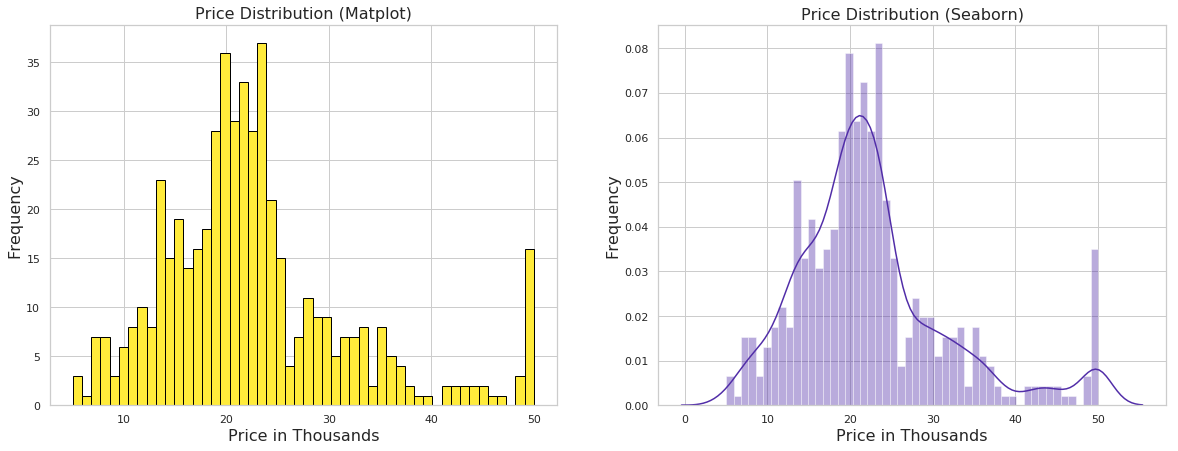

In [8]:
#PRICE DISTRIBUTION
#setting plot size
plt.figure(figsize=(20,7))
sns.set(style="whitegrid")

#plot using matplotlib
plt.subplot(1,2,1)   #arguments no of rows,columns, and index
plt.hist(data.PRICE,bins=50,ec="black",color="#FFEB3B")  #ec- edge color
plt.xlabel("Price in Thousands",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Price Distribution (Matplot)",fontsize=16)


#plot using seaborn
plt.subplot(1,2,2)
sns.distplot(data.PRICE,bins=50,color="#512DA8")
plt.xlabel("Price in Thousands",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Price Distribution (Seaborn)",fontsize=16)
#there are outliers in price

##### From the above graph it is clear that house prices are postively skewed.

Text(0.5, 1.0, 'RM Distribution (Seaborn)')

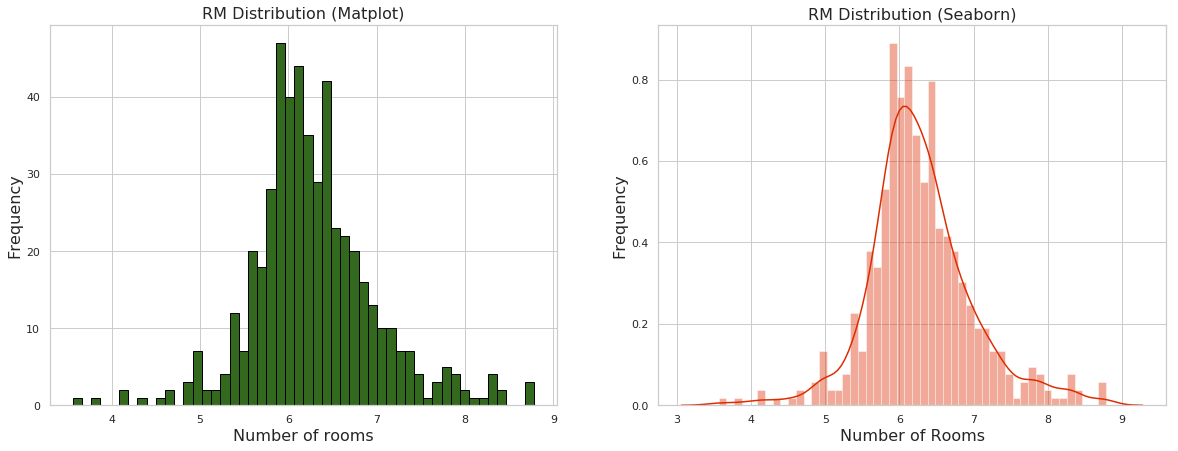

In [9]:
#Rooms plot 
plt.figure(figsize=(20,7))
sns.set(style="whitegrid")

plt.subplot(1,2,1)
plt.hist(data.RM,bins=50,ec="black",color="#33691e") #ec- edge color
plt.xlabel("Number of rooms",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("RM Distribution (Matplot)",fontsize=16)


plt.subplot(1,2,2)
sns.distplot(data.RM,bins=50,color="#dd2c00")
plt.xlabel("Number of Rooms",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("RM Distribution (Seaborn)",fontsize=16)


##### On an average people preferred 6 rooms per houses

Text(0.5, 1.0, 'RAD Disrtibution (Seaborn)')

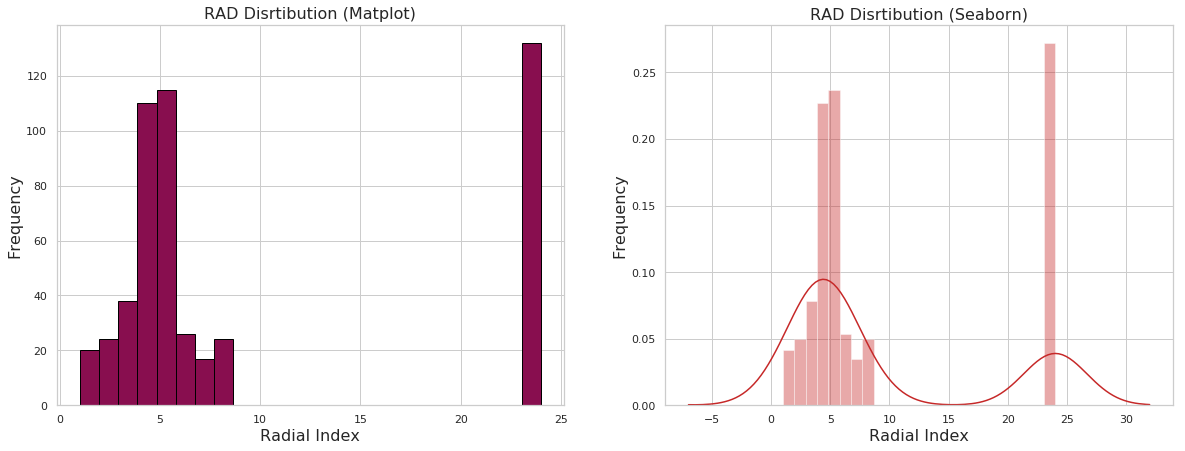

In [10]:
#Index of accessibility of highways 

#Setting figure size
plt.figure(figsize=(20,7))
sns.set(style="whitegrid")


#plot using matplotlib
plt.subplot(1,2,1)
plt.hist(data.RAD,bins=24,ec="black",color="#880e4f")
plt.xlabel("Radial Index",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("RAD Disrtibution (Matplot)",fontsize=16)

#plot using seaborn
plt.subplot(1,2,2) 
sns.distplot(data.RAD,bins=24,color="#c62828")
plt.xlabel("Radial Index",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("RAD Disrtibution (Seaborn)",fontsize=16)


In [11]:
#creating frequency variable to create frequency table for RAD
freq=data.RAD.value_counts()
freq

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

##### Looking at our graph we dont get a clear cut idea on reading what is RAD we get the idea that it is a index which has discreet values so the better way to represent the distribution is to use bar chart

Text(0.5, 1.0, 'RAD Disrtibution (Matplot)')

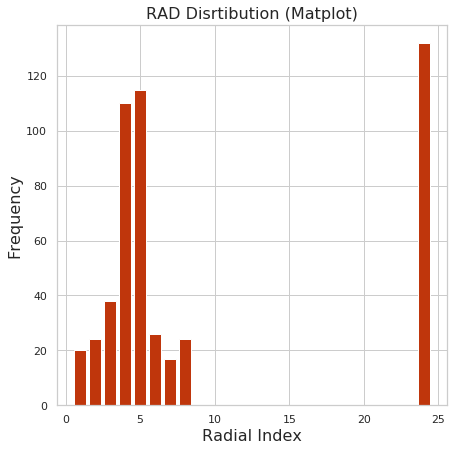

In [12]:
#creating a barchart
#Setting figure size
plt.figure(figsize=(7,7))
sns.set(style="whitegrid")


#plot using matplotlib

plt.bar(freq.index,height=freq,color="#bf360c")
plt.xlabel("Radial Index",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("RAD Disrtibution (Matplot)",fontsize=16)


##### From the bar plot it is clear that people prefered those houses which had easy accessibility to the radial Highways

## Statistical Analysis

In [13]:
#this will return statistical summary
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### From above table we can see that we have some outliers in our dataset e.g in CRIM column if we look or median value is 0.25 while average is 3.6 and the heighest value is 89 which is a indication that our data has outlier in it thats why there is stark difference between the median and mean.similarly we can check for other variables too.

In [14]:
#corrleation of price with attributes using pearson method
corr_mat=data.corr()

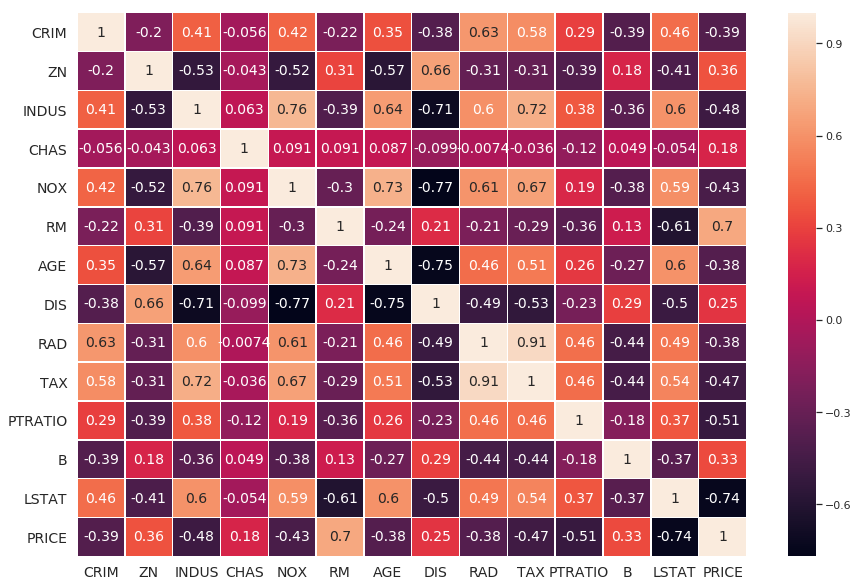

In [15]:
#creating correlation heatmap
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(corr_mat,annot=True,annot_kws={"size":14},linewidth=.5)

#### NOX and INDUS are highly correlated because in industrial area polution tend to be on higher side
#### TAX and INDUS are also highly correlated this is because government charges more to industries
#### DIS in negatively correlated with with INDUS and reason being industries tends to prefer those places where they easily get labour.
####  AGE is neagtively correlated with DIS. the reason can be that earlier people where not that much health conscious so they usally stayed near to the industries.
#### TAX and RAD are the which are highly correlated which is the evident the shortfall of pearson corelation coeff that it is not a goode measure when it comes to discreet variables.
#### Correlation only check the linear relationship between variables, so in order to get the right picture we will use scatter plots


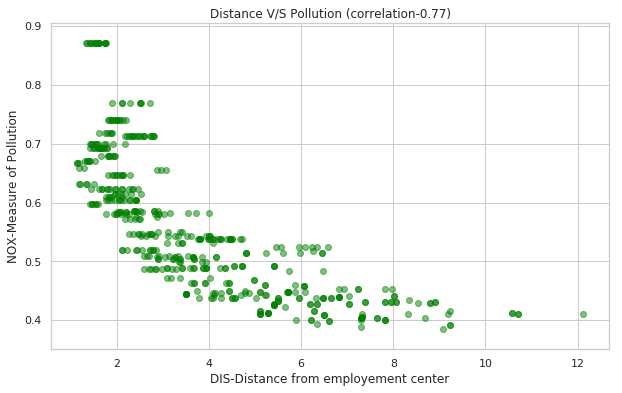

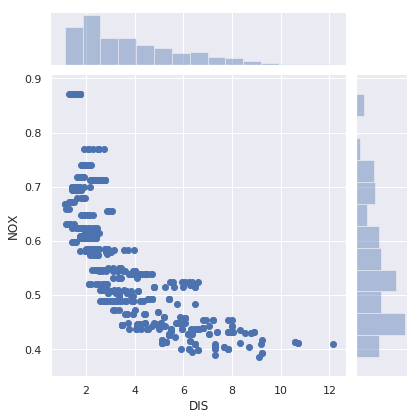

In [16]:
#plot between NOX(measure of pollution) and DIS(distance to employement centres)
data.ND=round((data.NOX.corr(data.DIS)),2)


plt.figure(figsize=(10,6))

plt.scatter(x=data.DIS,y=data.NOX,color="green",alpha=0.5)
plt.xlabel("DIS-Distance from employement center",fontsize=12)
plt.ylabel("NOX-Measure of Pollution",fontsize=12)
plt.title(f"Distance V/S Pollution (correlation{data.ND})",fontsize=12)

#creating the seaborn plot
sns.set() # to change the styling
sns.jointplot(x=data.DIS,y=data.NOX)
plt.show() 

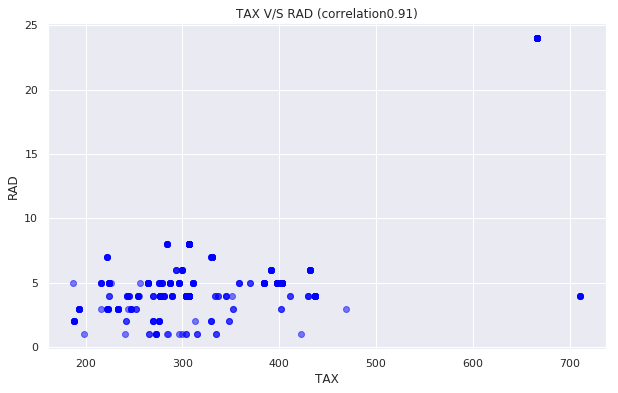

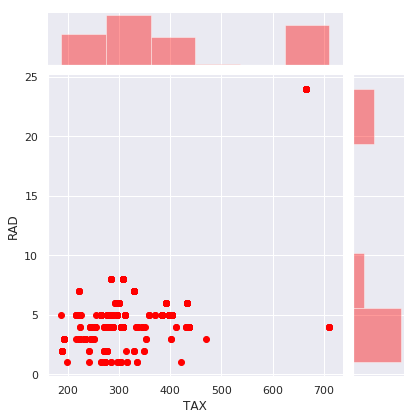

In [17]:
#plot between NOX(measure of pollution) and RADdistance to employement centres)
data.ND=round((data.TAX.corr(data.RAD)),2)


plt.figure(figsize=(10,6))

plt.scatter(x=data.TAX,y=data.RAD,color="blue",alpha=0.5)
plt.xlabel("TAX",fontsize=12)
plt.ylabel("RAD",fontsize=12)
plt.title(f"TAX V/S RAD (correlation{data.ND})",fontsize=12)

#creating the seaborn plot
sns.set() # to change the styling
sns.jointplot(x=data.TAX,y=data.RAD,color="red")
plt.show() 

##### From this scatter plot we can see that our correlation is 0.9 but in scatter plot we see that our correlation is due to the presence of outlier hence we should always use scatter plot to verify the result

/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


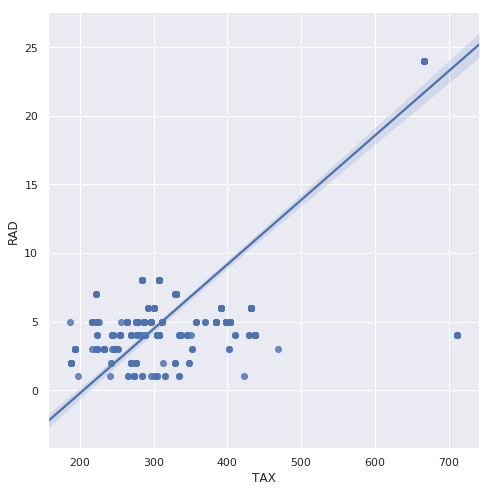

In [18]:
#running linear regression and plotting it, for this we use seaborn
sns.lmplot(x="TAX",y="RAD",data=data,size=7)
plt.show()

Text(0.5, 1.0, 'Price Vs No. of Rooms (correlation0.7)')

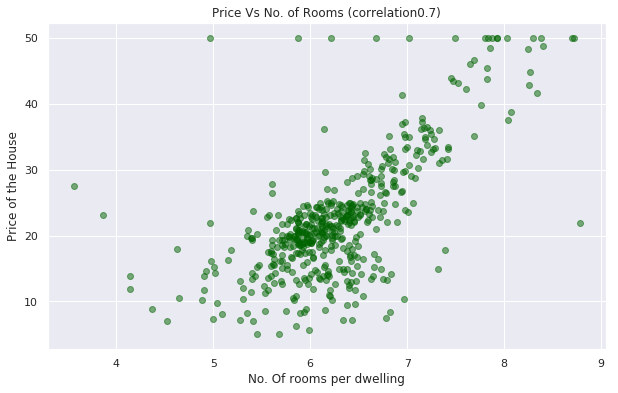

In [19]:
#price and RM 
data.ND=round((data.PRICE.corr(data.RM)),2)
 
plt.figure(figsize=(10,6))

plt.scatter(x=data.RM,y=data.PRICE,color="darkgreen",alpha=0.5)
plt.xlabel("No. Of rooms per dwelling",fontsize=12)
plt.ylabel("Price of the House",fontsize=12)
plt.title(f"Price Vs No. of Rooms (correlation{data.ND})",fontsize=12)



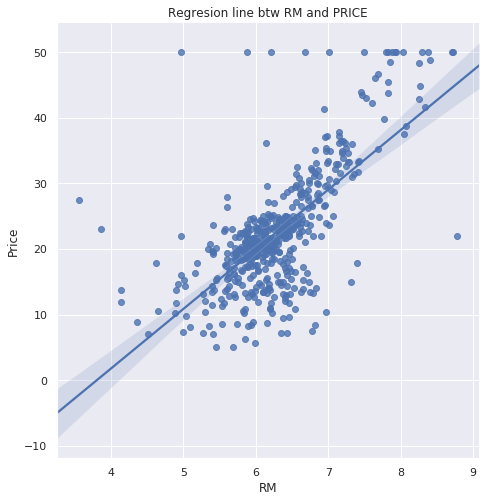

In [20]:
#regression plot using seaborn
sns.lmplot(x="RM",y="PRICE",data=data,size=7)
plt.title("Regresion line btw RM and PRICE")
plt.xlabel("RM")
plt.ylabel("Price")
plt.show()

##### Above regression plot show that our RM variable explains the prices very well

##### creating a pairplot, a pairplot plots all the variables at once, since it has to do alot of work
##### we use microbenchmarking 

In [21]:
%%time
#sns.pairplot(data,kind="reg",plot_kws={"line_kws":{"color":"cyan"}})
#plt.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.2 µs



##### scatter plot between LSTAT and Property Prices
##### LSTAT-lower status neighbhourhood that is those people those who dont have high school education and the male those who are consider to be labour class

Text(0.5, 1.0, 'LSTAT Vs No. of Rooms (correlation-0.74)')

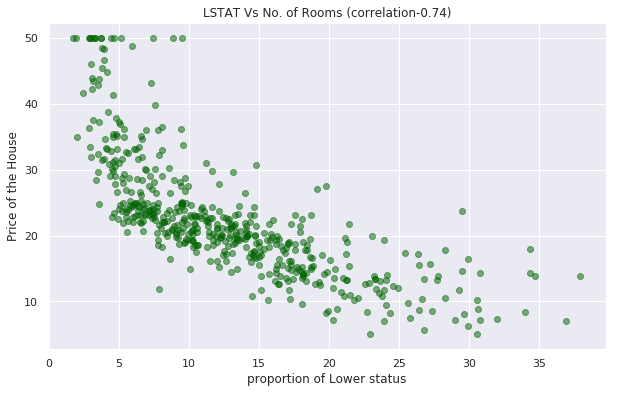

In [22]:
data.ND=round((data.PRICE.corr(data.LSTAT)),2)
 
plt.figure(figsize=(10,6))

plt.scatter(x=data.LSTAT,y=data.PRICE,color="darkgreen",alpha=0.5)
plt.xlabel("proportion of Lower status",fontsize=12)
plt.ylabel("Price of the House",fontsize=12)
plt.title(f"LSTAT Vs No. of Rooms (correlation{data.ND})",fontsize=12)

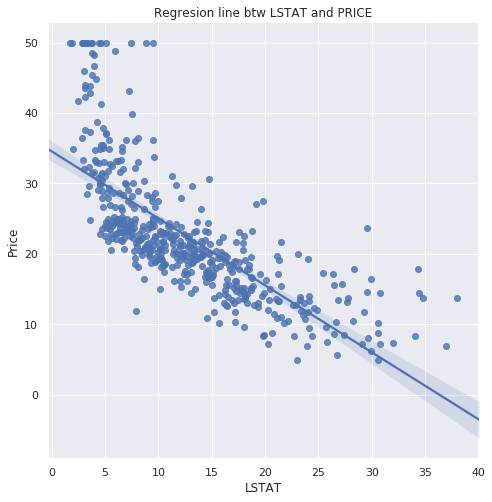

In [23]:
#regression plot using seaborn
sns.lmplot(x="LSTAT",y="PRICE",data=data,size=7)
plt.title("Regresion line btw LSTAT and PRICE")
plt.xlabel("LSTAT")
plt.ylabel("Price")
plt.show()

##### Splitting dataset into train and test data

In [24]:
#creating target and features
prices=data.PRICE
features=data.drop("PRICE",axis=1)


#tuple unpacking / dividing dataset
X_train,X_test,Y_train,Y_test=train_test_split(features,prices,train_size=0.8,random_state=10)


##### Building model

In [25]:
reg=LinearRegression()
model_1=reg.fit(X_train,Y_train)
print("Train data R squared value is :",model_1.score(X_train,Y_train))
print("Test data R squared values is :",model_1.score(X_test,Y_test))

print("Intercept :",model_1.intercept_)
slope=pd.DataFrame(model_1.coef_,index=X_train.columns,columns=["Slope"])
slope

Train data R squared value is : 0.750121534530608
Test data R squared values is : 0.6709339839115628
Intercept : 36.53305138282439


,Slope
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


##### Sklearn Linear Regression is not very good for draing statistical inferences so we are using stats model OLS

In [26]:
y=Y_train
x=sm.add_constant(X_train)
mod=sm.OLS(y,x)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     90.06
Date:                Sat, 17 Aug 2019   Prob (F-statistic):          1.12e-108
Time:                        21:59:03   Log-Likelihood:                -1170.5
No. Observations:                 404   AIC:                             2369.
Df Residuals:                     390   BIC:                             2425.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5331      5.428      6.730      0.000      25.861      47.205
CRIM          -0.1282      0.032     -4.005      0.000      -0.191      -0.065
ZN             0.0632      0.014      4.420      0.000       0.035       0.091
INDUS         -0.0076      0.063     -0.119      0.905      -0.132       0.117
CHAS           1.9745      0.924      2.138      0.033       0.159       3.790
NOX          -16.2720      3.965     -4.104      0.000     -24.067      -8.477
RM             3.1085      0.449      6.926      0.000       2.226       3.991
AGE            0.0163      0.015      1.123      0.262      -0.012       0.045
DIS           -1.4830      0.214     -6.920      0.000      -1.904      -1.062
RAD            0.3040      0.067      4.514      0.000       0.172       0.436
TAX           -0.0121      0.004     -3.208      0.001      -0.019      -0.005
PTRATIO       -0.8203      0.141     -5.826      0.000      -1.097      -0.543
B              0.0114      0.003      4.239      0.000       0.006       0.017
LSTAT         -0.5816      0.053    -11.016      0.000      -0.685      -0.478
==============================================================================
Omnibus:                      141.305   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              651.065
Skew:                           1.454   Prob(JB):                    4.20e-142
Kurtosis:                       8.497   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Checking for the Assumption of linear Regression

## Assumption of Homoscadasticity

In [27]:
#checking for the assumption of Homoscadasticity
from statsmodels.stats.diagnostic import het_goldfeldquandt 
het_goldfeldquandt(Y_train,X_train)

(1.1550879819496467, 0.16125523076298962, 'increasing')

## We used goldfeld test to check this assumption
   ##### Null hypothesis : no heteroscadasticity
   ##### Alternate hypothesis : there is heteroscadasticity.
   ##### since our p value is greater than 0.05 we reject null hypothesis there is no heteroscadasticity in the model

## Assumption of no Auto-correlation
Since Durbin Watson test is 2.12 we have no auto-correlation

## Assumption of Multicolinearity
##### Using variation Inflation Factor

In [28]:
mc=pd.Series([variance_inflation_factor(x.values, i) 
               for i in range(x.shape[1])], 
              index=x.columns)
mc=round(mc,2)
mc

const      597.55
CRIM         1.71
ZN           2.33
INDUS        3.94
CHAS         1.08
NOX          4.41
RM           1.84
AGE          3.33
DIS          4.22
RAD          7.31
TAX          8.51
PTRATIO      1.84
B            1.34
LSTAT        2.81
dtype: float64


#### Also the data is skewed we will use log tranformation and then will run this model again
#### Applying log transformation

1.1080984082549072
-0.33032129530987864


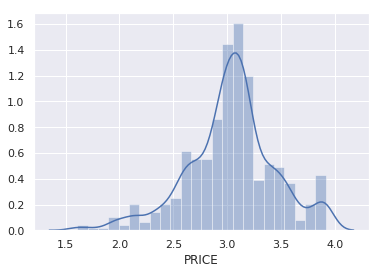

In [29]:
#the price data is rightly skewd
print(data.PRICE.skew())

y_log=np.log(data.PRICE)
#applying the log transformation 

print(y_log.skew())

sns.distplot(y_log)
plt.show()

##### Creating a Model Using log tranformation

In [30]:
y=np.log(Y_train)
x=sm.add_constant(X_train)
mod=sm.OLS(y,x)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sat, 17 Aug 2019   Prob (F-statistic):          1.70e-124
Time:                        21:59:04   Log-Likelihood:                 111.88
No. Observations:                 404   AIC:                            -195.8
Df Residuals:                     390   BIC:                            -139.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0599      0.227     17.880      0.000       3.614       4.506
CRIM          -0.0107      0.001     -7.971      0.000      -0.013      -0.008
ZN             0.0016      0.001      2.641      0.009       0.000       0.003
INDUS          0.0020      0.003      0.765      0.445      -0.003       0.007
CHAS           0.0803      0.039      2.079      0.038       0.004       0.156
NOX           -0.7041      0.166     -4.245      0.000      -1.030      -0.378
RM             0.0734      0.019      3.910      0.000       0.036       0.110
AGE            0.0008      0.001      1.258      0.209      -0.000       0.002
DIS           -0.0476      0.009     -5.313      0.000      -0.065      -0.030
RAD            0.0146      0.003      5.170      0.000       0.009       0.020
TAX           -0.0006      0.000     -4.095      0.000      -0.001      -0.000
PTRATIO       -0.0348      0.006     -5.908      0.000      -0.046      -0.023
B              0.0005      0.000      4.578      0.000       0.000       0.001
LSTAT         -0.0314      0.002    -14.213      0.000      -0.036      -0.027
==============================================================================
Omnibus:                       28.711   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.952
Skew:                           0.093   Prob(JB):                     9.84e-24
Kurtosis:                       5.502   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Removing Uneccesary variable


In [31]:
y=np.log(Y_train)
new_x=X_train.drop(["INDUS","AGE"],axis=1)
x=sm.add_constant(new_x)
mod=sm.OLS(y,x)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     135.6
Date:                Sat, 17 Aug 2019   Prob (F-statistic):          3.68e-126
Time:                        21:59:04   Log-Likelihood:                 110.76
No. Observations:                 404   AIC:                            -197.5
Df Residuals:                     392   BIC:                            -149.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0359      0.226     17.819      0.000       3.591       4.481
CRIM          -0.0107      0.001     -8.002      0.000      -0.013      -0.008
ZN             0.0015      0.001      2.465      0.014       0.000       0.003
CHAS           0.0864      0.038      2.251      0.025       0.011       0.162
NOX           -0.6164      0.155     -3.990      0.000      -0.920      -0.313
RM             0.0761      0.018      4.155      0.000       0.040       0.112
DIS           -0.0527      0.008     -6.376      0.000      -0.069      -0.036
RAD            0.0137      0.003      5.060      0.000       0.008       0.019
TAX           -0.0006      0.000     -4.098      0.000      -0.001      -0.000
PTRATIO       -0.0335      0.006     -5.770      0.000      -0.045      -0.022
B              0.0005      0.000      4.611      0.000       0.000       0.001
LSTAT         -0.0303      0.002    -14.706      0.000      -0.034      -0.026
==============================================================================
Omnibus:                       30.564   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.705
Skew:                           0.117   Prob(JB):                     2.76e-26
Kurtosis:                       5.634   Cond. No.                     1.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#creating target and features
prices=np.log(data.PRICE)

#tuple unpacking / dividing dataset
X_train,X_test,Y_train,Y_test=train_test_split(features,prices,train_size=0.8,random_state=10)

x=X_train.drop(["AGE","INDUS"],axis=1)
y=X_test.drop(["AGE","INDUS"],axis=1)
reg=LinearRegression()
model_1=reg.fit(x,Y_train)
print("Train data R squared value is :",model_1.score(x,Y_train))
print("Test data R squared values is :",model_1.score(y,Y_test))

print("Intercept :",model_1.intercept_)


Train data R squared value is : 0.7918657661852815
Test data R squared values is : 0.7490934185196079
Intercept : 4.03592171504838


## RESIDUAL 

In [33]:
#residuals plotting
res.resid
corr=round(Y_train.corr(res.fittedvalues),2)


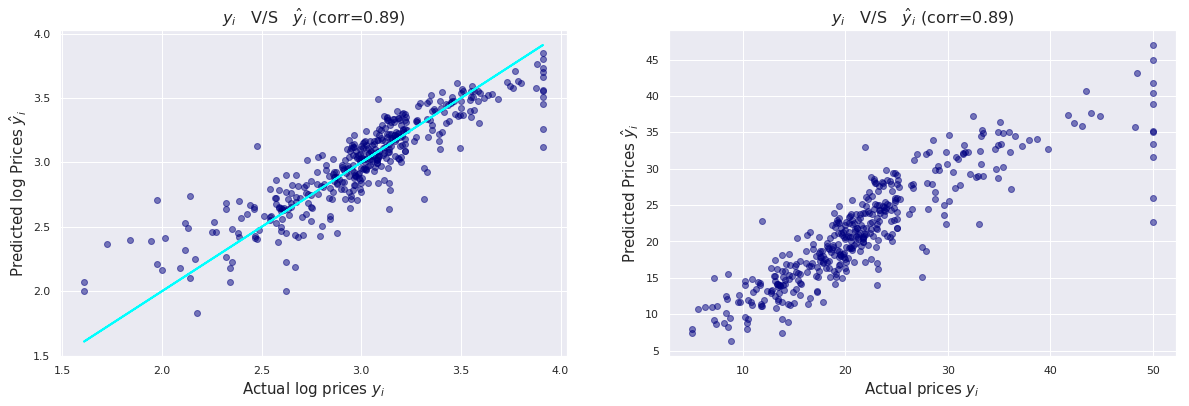

In [34]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(x=Y_train,y=res.fittedvalues,c="navy",alpha=0.5)
 
plt.xlabel("Actual log prices $y _i$",fontsize=15)
plt.ylabel("Predicted log Prices $\hat y _i$",fontsize=15)
plt.title(f"$y _i$   V/S   $\hat y _i$ (corr={corr})",fontsize=16)
plt.plot(Y_train,Y_train,c="cyan",linewidth=2)

plt.subplot(1,2,2)
plt.scatter(x=np.e**Y_train,y=np.e**res.fittedvalues,c="navy",alpha=0.5)

plt.xlabel("Actual prices $y _i$",fontsize=15)
plt.ylabel("Predicted Prices $\hat y _i$",fontsize=15)
plt.title(f"$y _i$   V/S   $\hat y _i$ (corr={corr})",fontsize=16)
plt.show()

### There are few outliers in the data which we have to deal with

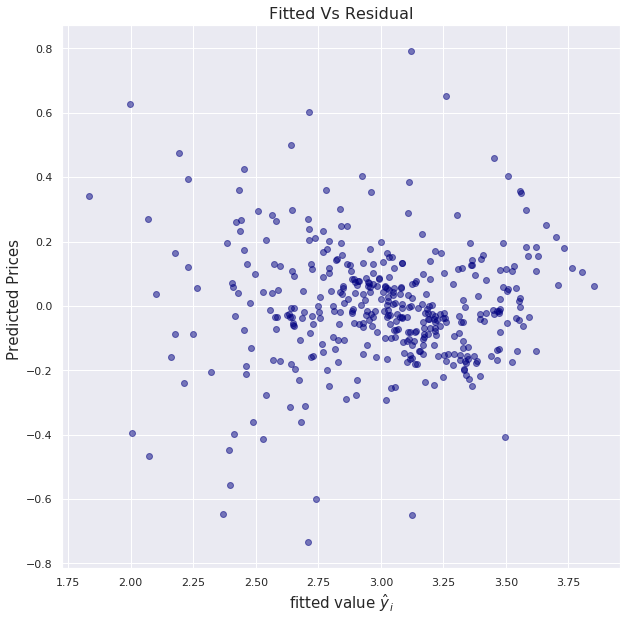

In [35]:
#Residual vs predicted value
plt.figure(figsize=(10,10))
plt.scatter(x=res.fittedvalues,y=res.resid,c="navy",alpha=0.5)

plt.xlabel("fitted value $\hat y _i$",fontsize=15)
plt.ylabel("Predicted Prices ",fontsize=15)
plt.title("Fitted Vs Residual",fontsize=16)
plt.show()

residuals are centred around the zero

Residual Mean -0.0
Residual_Skew 0.12


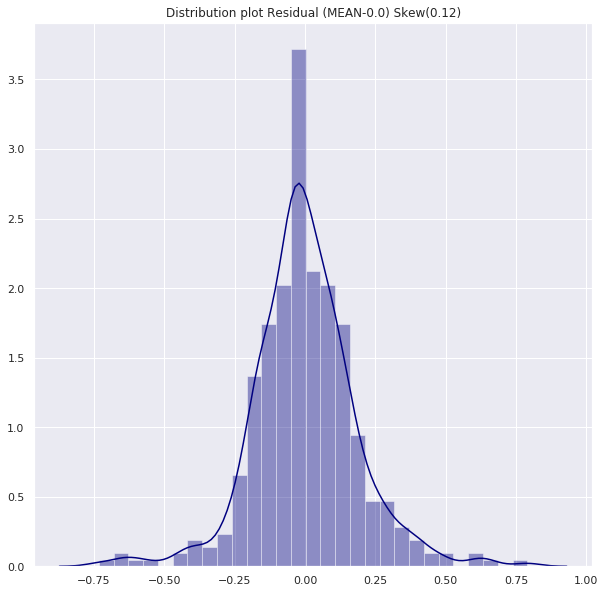

In [36]:
#checking for normality of residual
resid_mean=round(res.resid.mean(),2)
print("Residual Mean",resid_mean)

resid_skew=round(res.resid.skew(),2)
print("Residual_Skew",resid_skew)

plt.figure(figsize=(10,10))
sns.distplot(res.resid,color="navy")
plt.title(f"Distribution plot Residual (MEAN{resid_mean}) Skew({resid_skew})")
plt.show()

Above graph we can se that our residual are very well normally distributed and skewness is close to zero

In [37]:
#mean Squared error
reduced_log_mse=round(res.mse_resid,2)
reduced_log_mse

0.03